In [1]:
import pandas as pd
import os

In [2]:
full_fname=r"KL_Jahreswerte_Beschreibung_Stationen.txt"

In [3]:
print(full_fname)

KL_Jahreswerte_Beschreibung_Stationen.txt


In [18]:
headers = open("KL_Jahreswerte_Beschreibung_Stationen.txt").readline().split()
df_stat = pd.read_fwf(
    full_fname,
    encoding="cp1252",
    skiprows=2,
    names=headers,
    index_col="Stations_id", 
    parse_dates=["von_datum","bis_datum"])

In [19]:
idx_NRW    = df_stat["Bundesland"] == "Nordrhein-Westfalen"
idx_active = df_stat["bis_datum"]  == "2022-12-31"
idx_early  = df_stat["von_datum"]   < "1950"

In [20]:
df_stat_short = df_stat[idx_NRW & idx_active & idx_early]
df_stat_short

,von_datum,bis_datum,Stationshoehe,geoBreite,geoLaenge,Stationsname,Bundesland
Stations_id,,,,,,,
1078,1940-01-01,2022-12-31,37,51.2960,6.7686,Düsseldorf,Nordrhein-Westfalen
1300,1931-01-01,2022-12-31,351,51.2540,8.1565,Eslohe,Nordrhein-Westfalen
1303,1888-01-01,2022-12-31,150,51.4041,6.9677,Essen-Bredeney,Nordrhein-Westfalen
1327,1937-01-01,2022-12-31,147,50.7119,6.7905,Weilerswist-Lommersum,Nordrhein-Westfalen
1590,1937-01-01,2022-12-31,37,51.4942,6.2463,Geldern-Walbeck,Nordrhein-Westfalen
2110,1938-01-01,2022-12-31,57,51.0411,6.1042,Heinsberg-Schleiden,Nordrhein-Westfalen
2483,1926-11-01,2022-12-31,839,51.1803,8.4891,Kahler Asten,Nordrhein-Westfalen
2497,1937-01-01,2022-12-31,505,50.5014,6.5264,Kall-Sistig,Nordrhein-Westfalen
2629,1851-01-01,2022-12-31,46,51.7612,6.0954,Kleve,Nordrhein-Westfalen


In [21]:
import geopandas as gpd


In [22]:
df = pd.read_csv('Stations_id.csv')

gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.geoLaenge, df.geoBreite)
)
gdf.to_file('geopackage.gpkg', driver='GPKG')



In [23]:
zip_list = ("ziplist/jahreswerte_KL_01078_19400101_20211231_hist.zip", "ziplist/jahreswerte_KL_01300_19310101_20211231_hist.zip", "ziplist/jahreswerte_KL_01303_18880101_20211231_hist.zip","ziplist/jahreswerte_KL_01327_19370101_20211231_hist.zip","ziplist/jahreswerte_KL_01590_19370101_20211231_hist.zip", "ziplist/jahreswerte_KL_02110_19380101_20211231_hist.zip", "ziplist/jahreswerte_KL_02483_19261101_20211231_hist.zip", "ziplist/jahreswerte_KL_02497_19370101_20211231_hist.zip", "ziplist/jahreswerte_KL_02629_18510101_20211231_hist.zip", "ziplist/jahreswerte_KL_02968_19030101_20211231_hist.zip", "ziplist/jahreswerte_KL_04371_19310101_20211231_hist.zip", "ziplist/jahreswerte_KL_05717_19070101_20211231_hist.zip")

In [24]:
import pandas as pd
from zipfile import ZipFile

# Very compact code.
df = pd.DataFrame()
for elt in zip_list:
    with ZipFile(elt) as myzip:
        
        # read the time series data from the file starting with "produkt"
        prodfilename = [name for name in myzip.namelist() if name.split("_")[0]=="produkt"][0] 
        #print(prodfilename)
        
        # open just the produkt file within the archive
        with myzip.open(prodfilename) as myfile:
            dftmp = pd.read_csv(myfile, sep =";", parse_dates = ["MESS_DATUM_BEGINN", "MESS_DATUM_ENDE"], index_col = "MESS_DATUM_BEGINN", na_values = [-999.0])
            # select the series with the average annual temp ("JA_TT"), rename the series with the station_id and make it a df.
            s = dftmp["JA_TT"].rename(dftmp["STATIONS_ID"][0]).to_frame()
            # outer merge.
            df = pd.merge(df, s, left_index=True, right_index=True, how='outer')

df.index.rename(name = "year", inplace = True)
df

,1078,1300,1303,1327,1590,2110,2483,2497,2629,2968,4371,5717
year,,,,,,,,,,,,
1851-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.73,NaN,NaN,NaN
1852-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.90,NaN,NaN,NaN
1853-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.89,NaN,NaN,NaN
1854-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.09,NaN,NaN,NaN
1855-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.34,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-01,11.43,8.66,10.92,11.14,11.18,11.39,6.26,8.87,NaN,11.92,10.22,10.66
2018-01-01,12.12,9.24,11.79,11.60,11.86,11.85,7.26,9.49,NaN,12.67,11.05,NaN
2019-01-01,11.84,9.01,11.44,11.24,11.62,11.42,7.00,9.27,11.17,12.30,10.89,10.99


In [29]:
# Replace full datetime with year as integer
df.set_index(df.index.year, inplace= True) # extract year from index as int

In [58]:
mean = df[(df.index >= 1961) & (df.index <= 1990)].mean() # mean annual temp between 1961 and 1990
mean

1078    10.387143
1300     7.480000
1303     9.560667
1327     9.636667
1590     9.912222
2110     9.807143
2483     4.847333
2497     7.279310
2629     9.613000
2968    10.780000
4371     9.237333
5717     9.335333
dtype: float64

In [59]:
df_temp_diff = (df - mean)
df_temp_diff

,1078,1300,1303,1327,1590,2110,2483,2497,2629,2968,4371,5717
year,,,,,,,,,,,,
1851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.883,NaN,NaN,NaN
1852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.287,NaN,NaN,NaN
1853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.723,NaN,NaN,NaN
1854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.523,NaN,NaN,NaN
1855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.273,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,1.042857,1.18,1.359333,1.503333,1.267778,1.582857,1.412667,1.59069,NaN,1.14,0.982667,1.324667
2018,1.732857,1.76,2.229333,1.963333,1.947778,2.042857,2.412667,2.21069,NaN,1.89,1.812667,NaN
2019,1.452857,1.53,1.879333,1.603333,1.707778,1.612857,2.152667,1.99069,1.557,1.52,1.652667,1.654667


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

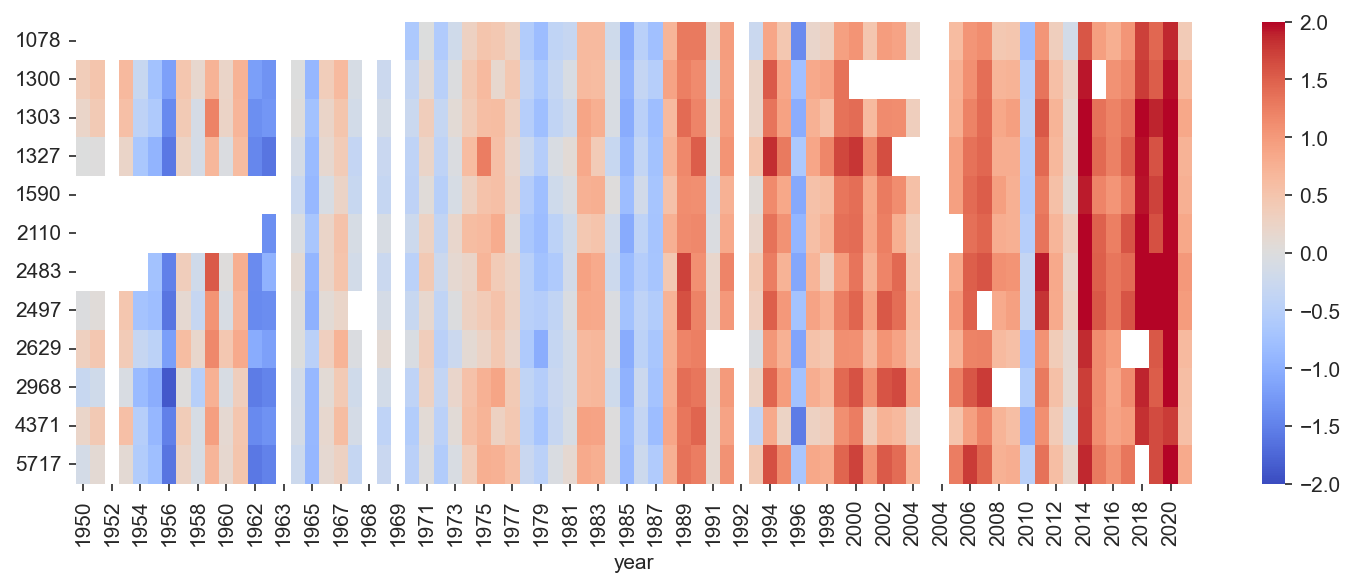

In [65]:
# plot
sns.set_style('ticks')
fig3, ax3 = plt.subplots(dpi = 150, figsize = (12,4))

#sns.heatmap(df_tdiff, cmap='coolwarm', annot=True, vmin = -2, vmax = 2, ax = ax3)
sns.heatmap(df_temp_diff[df_temp_diff.index >= 1950].T, cmap='coolwarm', vmin = -2, vmax = 2, ax = ax3)

fig3.savefig('NRW_Annual_Temp_Diff_Stripes.png')